In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.chdir('C:/Users/Mayin\Documents/1GRADUATE/1. Study/2. 24Spring/5224 Bayesian Statistics/5224_Project/')
data = pd.read_csv('student-por.csv')

In [13]:
data['sum'] = data[['G1', 'G2', 'G2']].mean(axis=1)

In [14]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sum
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,12.666667
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,10.666667
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,15.000000
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,11.666667
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,10.000000


c:\Users\Mayin\Downloads\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mayin\Downloads\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


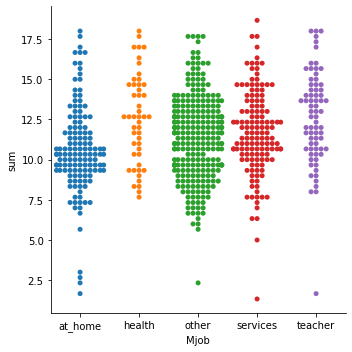

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个分类散点图
sns.catplot(x='Mjob', y='sum', data=data, kind='swarm')

# 显示图形
plt.show()

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 拟合线性模型
model = ols('sum ~ C(Mjob)+ C(Fjob)', data=data).fit()

# 进行ANOVA测试
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

               sum_sq     df         F    PR(>F)
C(Mjob)    186.594455    4.0  6.435060  0.000044
C(Fjob)     79.705868    4.0  2.748806  0.027491
Residual  4639.446166  640.0       NaN       NaN
